In [1]:
%matplotlib widget

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [6]:
root_dir = '/Users/zhihua/Documents/Work/Research/Projects/SBtracer/data_original/'

cnames = ['ctrl']#, 'GM2X', 'Redi2X', 'Kappa2X']
for cname in cnames:
    ds = xr.open_dataset(root_dir + 'single_basin_'+cname+'_compressed.nc')
    ds.close()
    dsm = ds[['Ttave', 'Stave', 'maskC', 'PTRtave01']].mean('time', keep_attrs=True).isel(Z=slice(1,None))
    dsm = dsm.rename_vars({'Ttave':'THETA', 'Stave':'SALT', 'PTRtave01':'AGE'})
    # dsm['SALT']  = dsm.SALT.where(dsm.Z!=dsm.Z[0], dsm.SALT.isel(Z=1))
    # dsm['THETA'] = dsm.THETA.where(dsm.Z!=dsm.Z[0], dsm.THETA.isel(Z=1))
    # dsm['AGE'] = dsm.AGE.where(dsm.Z!=dsm.Z[0], dsm.AGE.isel(Z=1))

In [7]:
dsm

<xarray.Dataset> Size: 7MB
Dimensions:  (Z: 29, YC: 144, XC: 60)
Coordinates:
    maskC    (Z, YC, XC) bool 251kB ...
  * XC       (XC) float32 240B 0.5 1.5 2.5 3.5 4.5 ... 55.5 56.5 57.5 58.5 59.5
  * YC       (YC) float32 576B -71.5 -70.5 -69.5 -68.5 ... 68.5 69.5 70.5 71.5
  * Z        (Z) float32 116B -30.0 -50.0 -70.0 ... -3.625e+03 -3.875e+03
    rA       (YC, XC) float32 35kB ...
    Depth    (YC, XC) float32 35kB ...
    drF      (Z) float32 116B ...
    PHrefC   (Z) float32 116B ...
    hFacC    (Z, YC, XC) float32 1MB ...
    rhoRef   (Z) float32 116B ...
Data variables:
    THETA    (Z, YC, XC) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SALT     (Z, YC, XC) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AGE      (Z, YC, XC) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(data_dir='/Users/anthon...

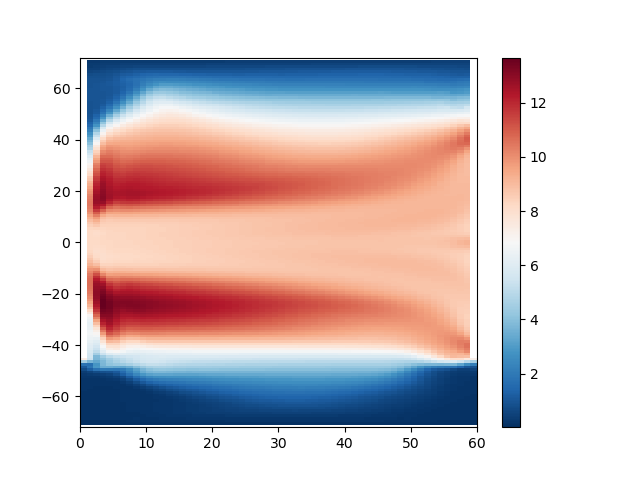

In [106]:
plt.close()
plt.figure()

plt.pcolormesh(dsm.XC, dsm.YC, dsm.THETA.where(dsm.maskC).isel(Z=9), cmap='RdBu_r')
plt.colorbar();

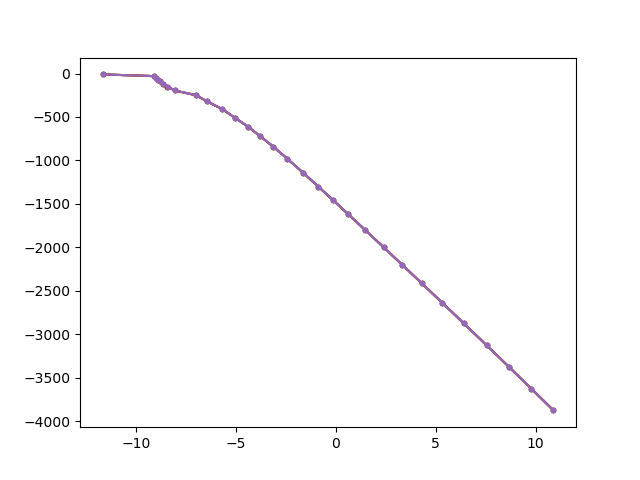

In [102]:
plt.close()
plt.figure()

# plt.plot(dsm.THETA.sel(XC=57.5, YC=5.5), dsm.Z, '.-');
# plt.plot(ds.Ttave.sel(XC=57.5, YC=5.5).T, dsm.Z, '.-');

# plt.plot(ds.RHOAnoma.sel(XC=57.5, YC=0.5).T, ds.Z, '.-');

# plt.plot(dsm.SALT.sel(XC=58.5, YC=59.5), dsm.Z, '.-');
# plt.plot(ds.Stave.sel(XC=58.5, YC=59.5).T, dsm.Z, '.-');

# plt.plot(dsm.AGE.sel(XC=58.5, YC=0.5), dsm.Z, '.-');
# plt.plot(ds.PTRtave01.sel(XC=58.5, YC=0.5).T, dsm.Z, '.-');


In [96]:
dsm.to_netcdf('/Users/zhihua/Documents/Work/GitHub/TMI.jl/data/SB_'+cname+'.nc')